## Random Numbers & Probability

### Continous Distributions
The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

#### Continous Uniform Distributions
* Estimate Probability for `less_than`, `greater_than`, & `intervals`

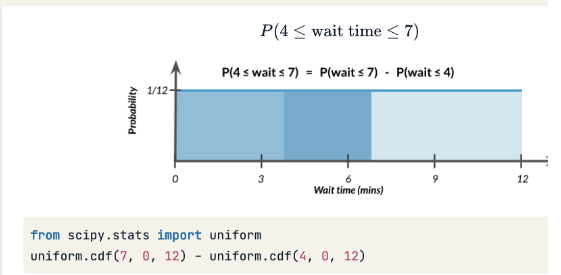

In [3]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

# Caclulate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

# Calculate the probability that Amir has to wait between 10 and 20 minutes, 
# and store in a variable called prob_between_10_and_20
# Take larger interval value less than and minus the lower band 
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


In [13]:
## Simulating Wait Times (create distribution to show him an expected wait time)
import numpy as np
import pandas as pd
np.random.seed(332)

# Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. 
# Save this as wait_times (1000, wait times between 0 and 30 mins)
wait_times = uniform.rvs(0, 30, 1000)
print(len(wait_times))
print(pd.Series(wait_times).describe())

1000
count    1000.000000
mean       14.901127
std         8.837441
min         0.015816
25%         6.770579
50%        14.813242
75%        22.861267
max        29.950282
dtype: float64


<AxesSubplot:ylabel='Count'>

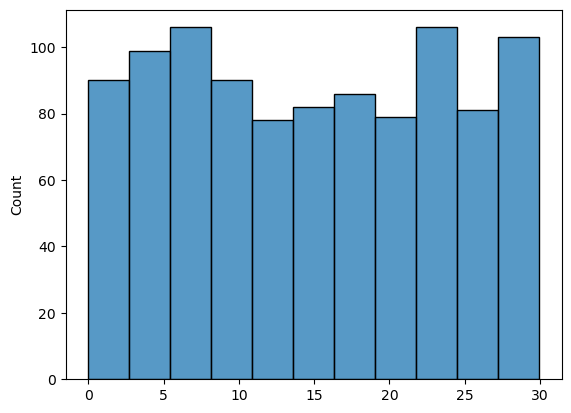

In [14]:
import seaborn as sns
sns.histplot(wait_times)

### Binomial Distribution
* Coin Flip Example
* Probability distribution of the number of successes in a sequence of independent trials

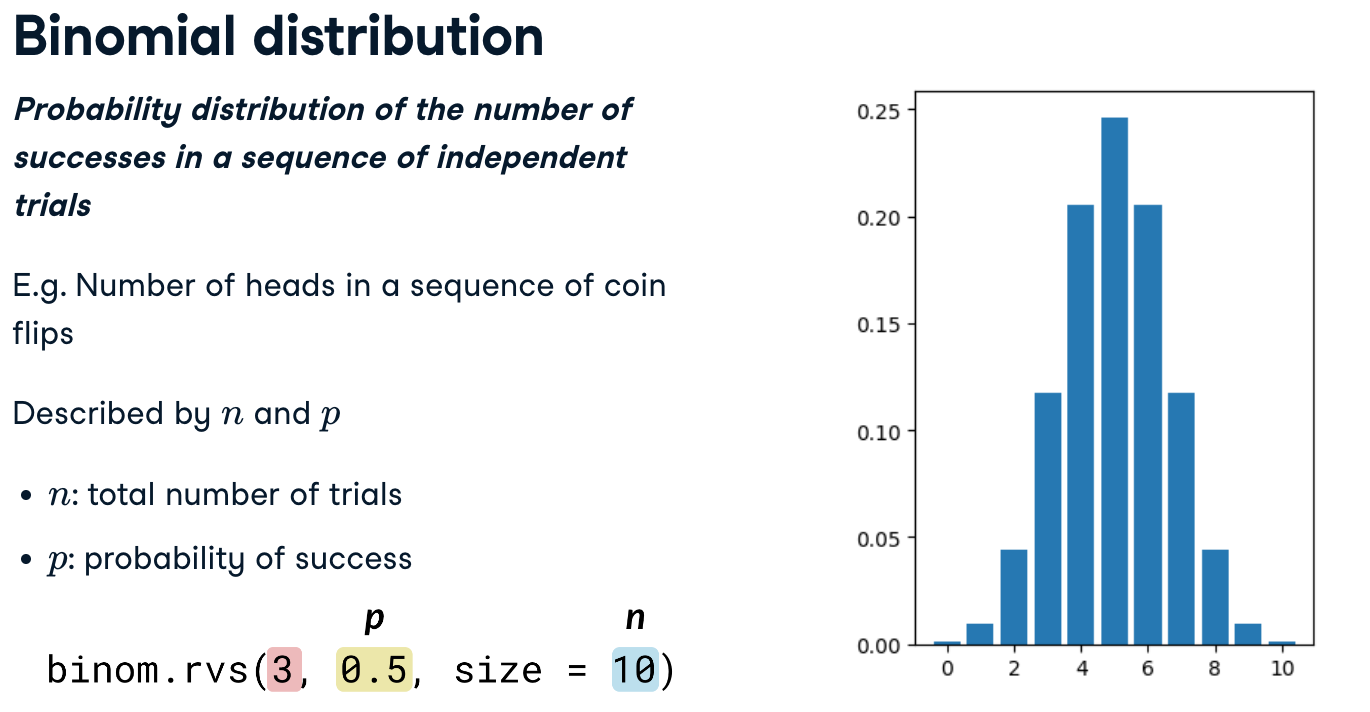

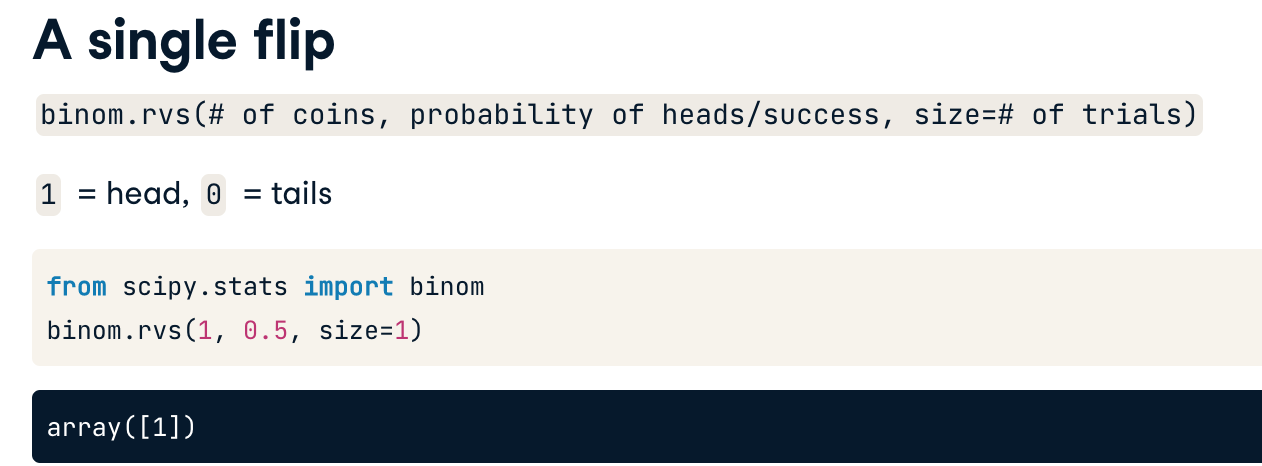

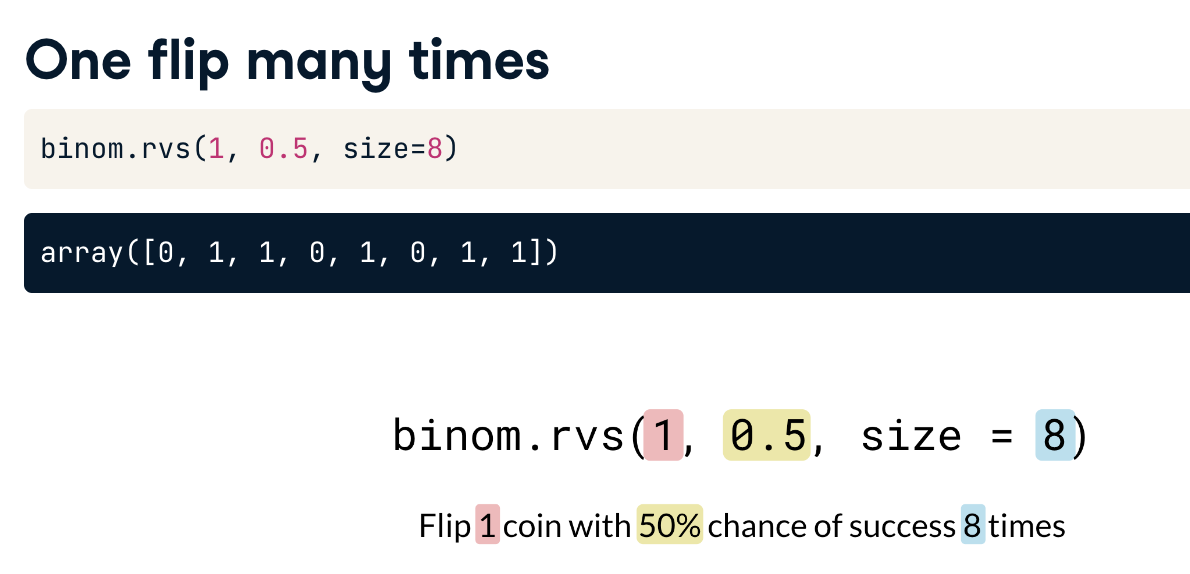

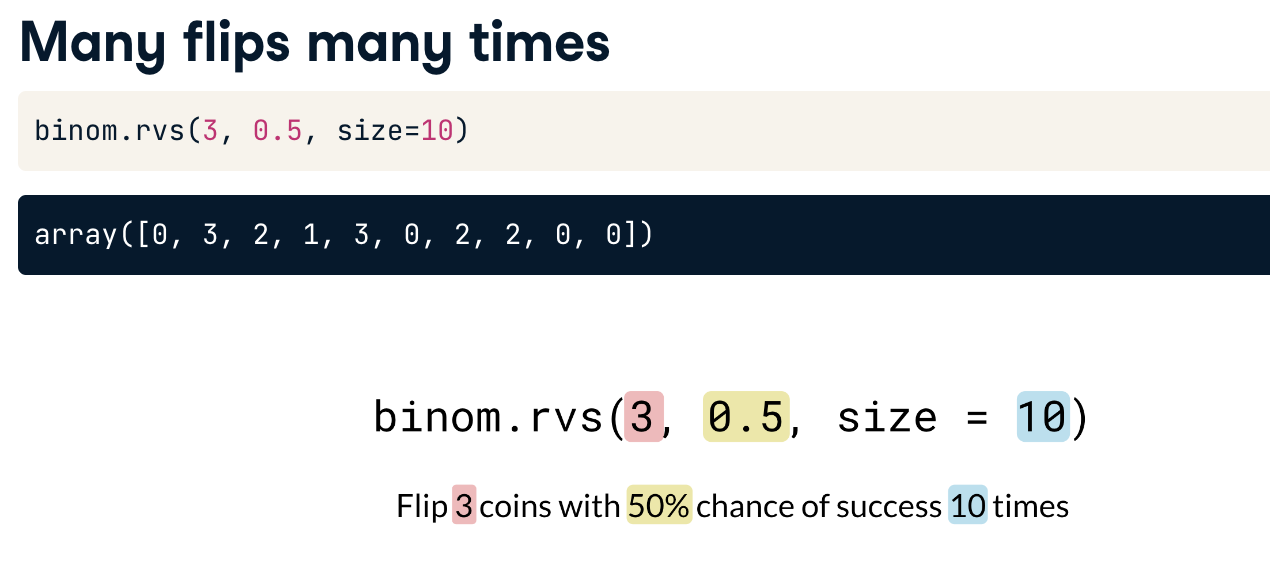

In [19]:
from scipy.stats import binom

# binom.rvs(# of coins, probabililty of heads/successes, size=# of trials)
two_coins_five = binom.rvs(2, 0.5, size=5) # 2 coins, 50% chance of success, 5 trials
print(two_coins_five)

lower_probability = binom.rvs(4, 0.25, size=5) # 4 events per interval (size), 25% chance of success
print(lower_probability)

[1 2 2 2 1]
[0 1 1 0 1]


In [20]:
# Probability of 7 heads 
# binom.pmf(num # heads (successes), num trials, prob of heads (successes))

seven_heads = binom.pmf(7, 10, 0.5)
seven_heads

0.11718749999999999

In [22]:
# binom-dot-cdf gives the probability of getting a number of successes less than or equal to the first argument.

# probability of 7 or fewer heads P(heads <= 7)
print(binom.cdf(7, 10, 0.5))

# probability of 7 or more heads
print(1 - binom.cdf(7, 10, 0.5))

0.9453125
0.0546875


#### Expected Value
* The expected value of the binomial distribution can be calculated by multiplying n times p. The expected number of heads we'll get from flipping 10 coins is 10 times 0-point-5, which is 5.

In [23]:
# Expected number of heads out of 10 flips
print(10 * 0.5)

5.0


#### Simulating Sales Deals (Binomial Simulations)
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [31]:
# Set a random seed
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1,0.3,size=1))

# Simulate a typical week of Amir's deals
print(binom.rvs(3, 0.3, size=1))

# Simulate a year's worth of Amir's deals
print(binom.rvs(3, 0.3, size=52))

# Simulate mean deals won per week
print(np.mean(binom.rvs(3, 0.3, size=52)))

[1]
[0]
[1 1 1 0 0 1 0 0 1 2 0 1 2 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 2 1 2 0 0 0 0 2 0
 1 1 2 0 2 1 1 0 2 0 0 1 0 2 0]
0.8846153846153846


#### Calculating binomial probabilities

In [32]:
# probability that amir closes all 3 deals in a week

# # binom.pmf(num # heads (successes), num trials, prob of heads (successes))

prob_3_closed = binom.pmf(3, 3, 0.3)

prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print("""
    The probability Amir closed all three deals in a week was : {}.
    The probability Amir closed one or fewer deals was : {}.
    The probability Amir closed more than one deal was : {}.
    """.format(prob_3_closed,prob_less_than_or_equal_1, prob_greater_than_1))



    The probability Amir closed all three deals in a week was : 0.026999999999999996.
    The probability Amir closed one or fewer deals was : 0.784.
    The probability Amir close more than one deal was : 0.21599999999999997.
    


#### How many sales will be won
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by 
.

In [33]:
# Expected number won with 30% win rate
won_30pct = 3 * .3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * .25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * .35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998
